In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Cargar archivo csv
data = pd.read_csv('ProductosFabricados2022_SinNulos.csv')

# Eliminar la columna 'Unnamed'
data = data.drop(columns=[col for col in data.columns if 'Unnamed' in col])
data.to_csv('ProductosFabricados2022_SinNulos.csv', index=False)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CVE_DOC                    1426 non-null   object 
 1   FECHA_DOC                  1426 non-null   object 
 2   NOMBRE_VENDEDOR            1426 non-null   object 
 3   NOMBRE_CLIENTE             1426 non-null   object 
 4   CANT                       1426 non-null   int64  
 5   CVE_ART                    1426 non-null   object 
 6   DESCR                      1426 non-null   object 
 7   PRECIO_UNITARIO            1426 non-null   float64
 8   COSTO_UNITARIO             1426 non-null   float64
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   float64
 10  SUBTOTAL_PARTIDA           1426 non-null   float64
 11  COSTO_TOTAL_CALCULADO      1426 non-null   float64
 12  MARGEN_UNITARIO_CALCULADO  1426 non-null   float64
 13  MARGEN_TOTAL_CALCULADO     1426 non-null   float

In [8]:
# Identificar valores nulos por dataframe
valores_nulos = data.isnull().sum()
valores_nulos

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE_VENDEDOR              0
NOMBRE_CLIENTE               0
CANT                         0
CVE_ART                      0
DESCR                        0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [9]:
# Crear 2 dataframe para poder procesar los outliers

cuantitativas = data.iloc [ : , [ 4, 7, 8, 9, 10, 11, 12, 13 ]]
cualitativas = data.iloc [ : , [ 0, 1, 2, 3, 5, 6 ]]

In [10]:
cuantitativas

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


<Figure size 1500x800 with 0 Axes>

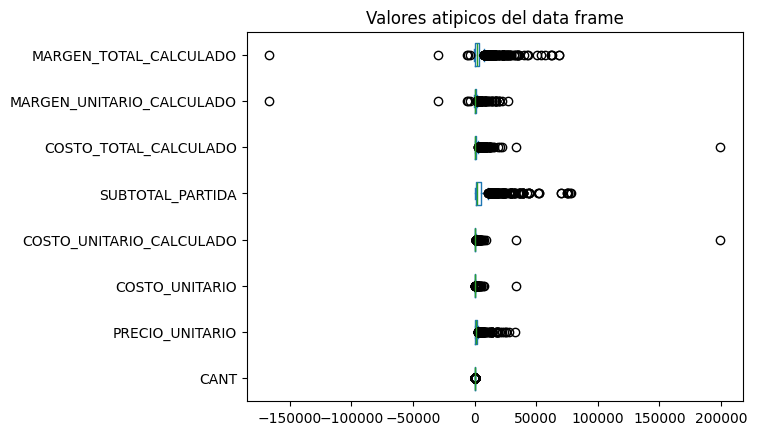

In [ ]:
# Realizamos diagrama de caja o bigote 
fig = plt.figure(figsize = (15,8))
cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos del data frame")
plt.show()

PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME 

In [11]:
# Método aplicando desviación estándar (encontrar valores extremos )
y = cuantitativas
limite_superior = y.mean() + 3*y.std()
limite_inferior = y.mean() - 3*y.std()

print("Limite superior permitido", limite_superior)
print("Limite inferior permitido", limite_inferior)

Limite superior permitido CANT                            22.531793
PRECIO_UNITARIO               9533.970813
COSTO_UNITARIO                3313.473534
COSTO_UNITARIO_CALCULADO     16686.790475
SUBTOTAL_PARTIDA             31402.663810
COSTO_TOTAL_CALCULADO        18629.377526
MARGEN_UNITARIO_CALCULADO    16001.398440
MARGEN_TOTAL_CALCULADO       28691.369713
dtype: float64
Limite inferior permitido CANT                           -14.324219
PRECIO_UNITARIO              -6499.204684
COSTO_UNITARIO               -2821.614250
COSTO_UNITARIO_CALCULADO    -15603.765678
SUBTOTAL_PARTIDA            -21404.897036
COSTO_TOTAL_CALCULADO       -15803.336348
MARGEN_UNITARIO_CALCULADO   -14049.656995
MARGEN_TOTAL_CALCULADO      -21519.643893
dtype: float64


In [12]:
# Obtenemos datos y los outliers se convierten en nulos en el dataframe
data1 = cuantitativas[( y <= limite_superior) & (y >= limite_inferior)]
data1

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [13]:
#Corroboramos valores nulos del dataframe
valores_nulos = data1.isnull().sum()
valores_nulos

CANT                         28
PRECIO_UNITARIO              29
COSTO_UNITARIO               10
COSTO_UNITARIO_CALCULADO      2
SUBTOTAL_PARTIDA             36
COSTO_TOTAL_CALCULADO         5
MARGEN_UNITARIO_CALCULADO    13
MARGEN_TOTAL_CALCULADO       24
dtype: int64

In [15]:
# Reemplazamos valores atípicos (nulos) del dataframe con "mean" 
# Realizamos una copia del dataframe
data_clean = data1.copy()
data_clean = data_clean.fillna(round(data1.mean(),1))
data_clean

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [18]:
# Corroboramos valores nulos del dataframe limpio
valores_nulos = data_clean.isnull().sum()
valores_nulos

CANT                         0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [17]:
data_clean.to_csv("ProductosFabricados2022_DesviacionEstandar.csv")

PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME

In [20]:
# Método aplicando cuartiles (0.25 y 0.75)
y = cuantitativas

porcentile25 = y.quantile(0.25) 
porcentile75 = y.quantile(0.75)

iqr = porcentile75 - porcentile25

#Q1
limite_superior_iqr = porcentile75 + 1.5*iqr

#Q2
limite_inferior_iqr = porcentile25 - 1.5*iqr

print("Limite superior permitido", limite_superior_iqr)
print("Limite inferior permitido", limite_inferior_iqr)

Limite superior permitido CANT                             8.50000
PRECIO_UNITARIO               2954.86625
COSTO_UNITARIO                 567.95000
COSTO_UNITARIO_CALCULADO       807.81375
SUBTOTAL_PARTIDA             10783.51250
COSTO_TOTAL_CALCULADO         2971.36250
MARGEN_UNITARIO_CALCULADO     2089.94625
MARGEN_TOTAL_CALCULADO        7807.59750
dtype: float64
Limite inferior permitido CANT                           -3.50000
PRECIO_UNITARIO              -927.40375
COSTO_UNITARIO               -340.77000
COSTO_UNITARIO_CALCULADO     -340.87625
SUBTOTAL_PARTIDA            -4946.78750
COSTO_TOTAL_CALCULADO       -1506.25750
MARGEN_UNITARIO_CALCULADO    -621.22375
MARGEN_TOTAL_CALCULADO      -3594.42250
dtype: float64


In [21]:
data1_iqr = cuantitativas[( y <= limite_superior_iqr) & (y >= limite_inferior_iqr)]
data1_iqr

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,NaN,NaN,NaN,5909.84,1884.35,NaN,4025.49


In [22]:
valores_nulos = data1_iqr.isnull().sum()
valores_nulos

CANT                         169
PRECIO_UNITARIO              127
COSTO_UNITARIO               128
COSTO_UNITARIO_CALCULADO     144
SUBTOTAL_PARTIDA             159
COSTO_TOTAL_CALCULADO        162
MARGEN_UNITARIO_CALCULADO    132
MARGEN_TOTAL_CALCULADO       168
dtype: int64

In [23]:
# Reemplazamos valores atípicos (nulos) del dataframe con "mean" 
# Realizamos una copia del dataframe
data3_iqr = data1_iqr.copy()
data3_iqr = data3_iqr.fillna(round(data1_iqr.mean(),1))
data3_iqr

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,942.70,108.00,219.90,5909.84,1884.35,684.80,4025.49


In [24]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo 

datos_limpios = pd.concat([cualitativas, data3_iqr], axis = 1)
datos_limpios

,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CVE_ART,DESCR,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12F1040A00,"CAS INOX 1/2""ØX3"" 400W 127V EXT.30CM",6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12H1050A00,"CAS INOX 1/2""ØX4"" 500W 127V EXT30CM",6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,F39835,2022-12-23,LETICIA RAMIREZ HERNANDEZ,SEVEN DAYS ALL SPORT,TUE00394,"TUB INOX 5/16""ØX300MM 5300W 220V ""M"" ESP",3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,F39837,2022-12-23,LETICIA RAMIREZ HERNANDEZ,REVUELTA MONTECARLO,TUA00470,"TUB INOX 1/2""ØX500MM 10KW 220V 2 1/2""NPT",1.0,942.70,108.00,219.90,5909.84,1884.35,684.80,4025.49


In [25]:
valores_nulos = datos_limpios.isnull().sum()
valores_nulos

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE_VENDEDOR              0
NOMBRE_CLIENTE               0
CVE_ART                      0
DESCR                        0
CANT                         0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [26]:
datos_limpios.to_csv("ProductosFabricados2022_Cuantiles.csv")